Kimberly Adams <br>
DSC 530
September 2022

Download data files from github

In [199]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Download author's functions.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [200]:
# Import numpy package
import numpy as np

# Import author's functions
import thinkstats2
import thinkplot

# Chapter 5
### Excercise 5-1

In order to join Blue Man Group, you have to be male and between 5′10″ (70 in) and 6′1″ (73 in) tall. What percentage of the US male population is in this range?

µ = 178 cm (70 in)

σ = 7.7 cm (3.03 in)

In [201]:
import scipy.stats

# Model a normal distribution with a mean of 70 inches and a standard deviation of 3.03 inches.
mu = 70
sigma = 3.03
NormDist = scipy.stats.norm(loc=mu, scale=sigma)

# Determine percentage of population that falls at the mean (5'10") and the percentage at 6'1".
small = NormDist.cdf(mu) * 100
tall = NormDist.cdf(mu + sigma) * 100

# To find the percentage in the range, subtract the low end of the range from the high end.
tall - small

34.1344746068543

*Roughly 34% of the US male population falls into the 5'10" to 6'1" tall height requirement of the Blue Man Group.*

### Excercise 5-2

To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. 

With the parameters  xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m. Plot this distribution. 

In [202]:
# Create Pareto distribution using 1 as the minimum value of x and an alpha value of 1.7.
xmin = 1
alpha = 1.7
ParetoDist = scipy.stats.pareto(b=alpha, scale=xmin)

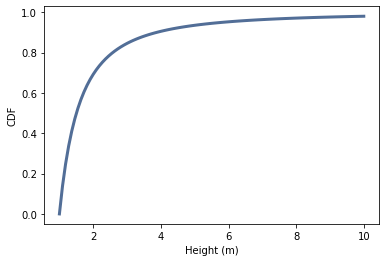

In [203]:
# Plot Pareto distribution with xmin = 1 and alpha = 1.7
height, prop = thinkstats2.RenderParetoCdf(1, 1.7, 0, 10.0, n=100)
thinkplot.Plot(height, prop)
thinkplot.Config(xlabel="Height (m)", ylabel="CDF")

What is the mean human height in Pareto world? 

In [204]:
ParetoDist.mean()

2.428571428571429

*The mean hieght in the Pareto world is 2.43 meters (95.7 inches).*

What fraction of the population is shorter than the mean?

In [205]:
# Find proportion of people that are up to 2.43 m tall in this population and multiply by 100 to get precentage.
ParetoDist.cdf(2.43) * 100

77.89607822883976

*Roughly 78% of the population is shorter than the mean height in this distribution.*

If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km?

In [206]:
# Subtract proportion at 1000 m height from 1 to find proportion taller.
# Multiply proportion by population of 7 billion to find number of people taller than 1000 m,
(1-ParetoDist.cdf(1000)) * 7000000000

55602.976430479954

*In this population, we would predict that 55,602 people are taller than 1000m.  Those are some really tall people!*

How tall do we expect the tallest person to be?

*We are looking for the height that give the lowest resulting value equaling but not less than 1 as this person would be essentially the last person added into the cumulative function.  I am going to use the guess and check method with only some of my guesses shown below.*

In [207]:
guess = 55700
(1-ParetoDist.cdf(guess)) * 7000000000

59.861032797314806

In [208]:
guess = 120000
(1-ParetoDist.cdf(guess)) * 7000000000

16.2364069966614

In [209]:
guess = 480000
(1-ParetoDist.cdf(guess)) * 7000000000

1.538111638055284

In [210]:
guess = 550000
(1-ParetoDist.cdf(guess)) * 7000000000

1.2203418275902322

In [211]:
guess = 650000
(1-ParetoDist.cdf(guess)) * 7000000000

0.9186397198490681

In [212]:
guess = 600000
(1-ParetoDist.cdf(guess)) * 7000000000

1.0525452731613427

In [213]:
guess = 615000
(1-ParetoDist.cdf(guess)) * 7000000000

1.0092771063341388

*I am going to stop here before I go crazy with roundoff error.  I am going to say that the tallest person is somewhere around 615000 meters (615 km) tall.*

# Chapter 6

### Excercise 6-1

In [214]:
# Download author's function set and dataset
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

# Import data into data frame
import hinc
income_df = hinc.ReadData()

In [215]:
# Brings in author's function to clean and interpret the dataset within the data frame
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # Apply a log10 transformation on the income column
    df['log_upper'] = np.log10(df.income)

    # Find the bottom of income range
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # Add unknown upper range unknowns
    df.loc[41, 'log_upper'] = log_upper
    
    # Count frequency within each income range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # Bring together all the separate income range counts into a single object
    log_sample = np.concatenate(arrays)
    return log_sample

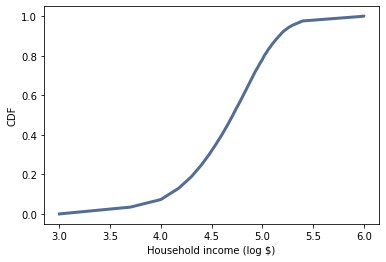

In [216]:
# Runs the author's InterpolateSample function to help clean the data 
# Creates a new sample with each income range proportionally represented
# Sets upper limit as 1 million dollars
log_sample = InterpolateSample(income_df, log_upper=6.0)

# Computes CDF of sample and then visualizes it in a plot
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

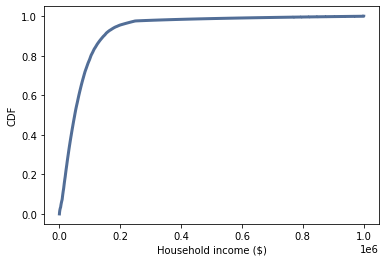

In [217]:
sample = np.power(10, log_sample) 

cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

In [218]:
# Add in more author functions for calculating various statistics in moments

# Calculate moments as the sums of powers
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

# Mean
def Mean(xs):
    return RawMoment(xs, 1)

# Central moments as the powers of distances from the mean
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

# Variance (2nd moment)
def Var(xs):
    return CentralMoment(xs, 2)

# Standardized moments - ratios of central moments where dimensions cancel each other
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

# Skewness (3rd moment)
def Skewness(xs):
    return StandardizedMoment(xs, 3)

# Median
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

# Pearson's median skewness
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample.

In [219]:
print("Median =", Median(sample))
print("Mean =", Mean(sample))
print("Skewness =", Skewness(sample))
print("Pearson's =", PearsonMedianSkewness(sample))

Median = 51226.45447894046
Mean = 74278.70753118733
Skewness = 4.949920244429583
Pearson's = 0.7361258019141782


*The results indicate that the mean is higher than the median which suggests a positive skew to the data which we see in the 4.9 skew value.  This confirms that the data is skewed to the right and would have a positive tail. The Pearson's skewness value of 0.73 is quite high and also backs up the positive skew result.*

What fraction of households reports a taxable income below the mean?

In [220]:
cdf.Prob(Mean(sample)) * 100

66.0005879566872

*About 66% of the sample population has a reported income below the mean.*

All of this is based on an assumption that the highest income is one million dollars, but that's certainly not correct.  What happens to the skew if the upper bound is 10 million?

In [221]:
# Runs the author's InterpolateSample function to help clean the data 
# Creates a new sample with each income range proportionally represented

# Sets upper limit as 10 million dollars
log_sample2 = InterpolateSample(income_df, log_upper=7.0)

sample2 = np.power(10, log_sample2)

print("Median =", Median(sample2))
print("Mean =", Mean(sample2))
print("Skewness =", Skewness(sample2))
print("Pearson's =", PearsonMedianSkewness(sample2))

print("Percentage below mean =",cdf.Prob(Mean(sample2)) * 100)

Median = 51226.45447894046
Mean = 124267.39722164685
Skewness = 11.603690267537793
Pearson's = 0.39156450927742087
Percentage below mean = 85.65630665207664


*Changing the upper limit from 1 to 10 million kept the median the same, but the distance between it and the mean is roughly twice as big.  The skew is also twice as big. Pearson's is half as large however suggesting that the outliers are impacting the skew value and since Pearson's is less sensitive to those effects, the value actually decreases.*

*The percentage of households below the mean also jumps from 66% to 86% below the new mean.*

*Without knowing the true upper value of the dataset, our calcuated values can vary widely based on our estimated top range value.*